In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report



# -----------------------------
# 1) 데이터 준비
# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weather.csv").dropna()

# 날짜 열 제거
df = df.drop(columns=['Location', 'RainTomorrow'])

df


,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,11/1/2007,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6
1,11/2/2007,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6
2,11/3/2007,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8
3,11/4/2007,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8
4,11/5/2007,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,...,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0
362,10/28/2008,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,...,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0
363,10/29/2008,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,...,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0
364,10/30/2008,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,...,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0


In [56]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [57]:
#레이블 불균형 확인

df['Rainfall'].value_counts()

,count
Rainfall,
0,234
1,15
3,6
2,5
4,4
6,3
9,3
5,3
15,3


In [58]:

# 결측치 확인
df.isnull().sum()

,0
Date,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [59]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
Date,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [60]:
df.columns  # 컬럼명 확인

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')

In [61]:
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,59,90,111,0,15,43,7,8,12,7,...,29,15,93,82,7,7,95,129,0,16
1,70,138,130,16,20,75,1,12,0,13,...,41,22,37,27,5,3,123,145,1,16
2,81,135,106,16,27,24,7,33,3,5,...,43,55,20,22,8,7,103,99,1,43
3,83,133,42,43,34,69,7,20,14,13,...,23,42,7,21,2,7,88,50,1,13
4,84,86,46,13,26,84,10,18,10,2,...,29,35,84,113,7,7,68,60,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,47,100,152,0,36,99,6,29,10,7,...,1,2,64,46,1,3,148,167,0,0
362,48,81,141,0,51,104,3,17,6,6,...,6,8,95,98,0,1,120,160,0,0
363,49,125,78,0,40,36,2,14,1,1,...,24,33,131,147,3,2,96,81,0,0
364,51,125,130,0,23,50,7,16,11,14,...,30,25,103,91,6,7,107,146,0,0


In [62]:
# X, y 분리
X = df.drop(columns=["Rainfall"])
y = df['Rainfall']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
y.head()

(262, 21) (262,)
(66, 21) (66,)


,Rainfall
0,0
1,16
2,16
3,43
4,13


In [63]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()         # 모델 구성
model.fit(X_train, y_train)        # 모델 훈련
ly_preds = model.predict(X_test)   # 예측데이터 생성
print(mean_squared_error(y_test, ly_preds))  #평가


31.666905603201602


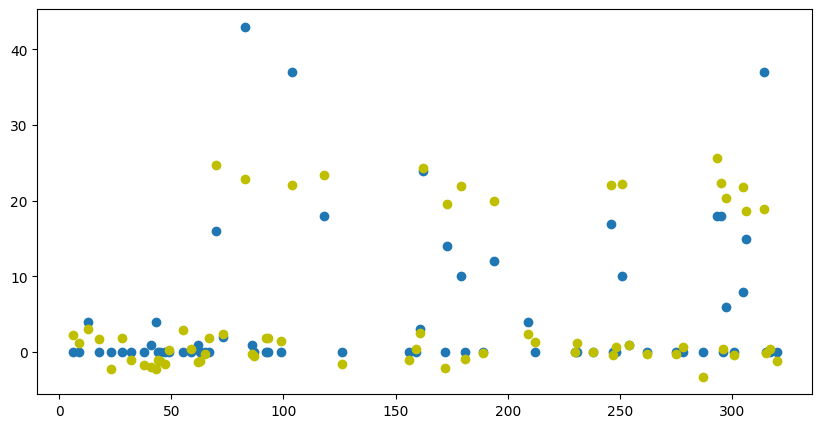

In [64]:

# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(X_test['RainToday'], y_test, label='y_test')
plt.scatter(X_test['RainToday'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [65]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 30.77078636363637


In [66]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['RainToday'], y_test, label='y_test')
plt.scatter(X_test['RainToday'], ry_preds, c='orange', label='ry_preds')

plt.show()


KeyError: 'Rainfall'

<Figure size 1000x500 with 0 Axes>